In [9]:
# import libraries for the demo
import wrd_client
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates


In [10]:
# define functions for the demo
def extractAnalyteDate(graph_data):
    analyteDateTime = list(
        map(lambda x: matplotlib.dates.datestr2num(x["DateTime"]), graph_data["AnalytesData"][0]["Points"]))
    analyteDateValue = list(map(lambda x: x["Value"], graph_data["AnalytesData"][0]["Points"]))
    return [analyteDateTime, analyteDateValue]

def extractGuidelineData(graph_data):
    analyteDateTime = list(
        map(lambda x: matplotlib.dates.datestr2num(x["DateTime"]), graph_data["GuidelineData"][0]["Points"]))
    analyteDateValue = list(map(lambda x: x["Value"], graph_data["GuidelineData"][0]["Points"]))
    return [analyteDateTime, analyteDateValue]

In [11]:
# instantiate WRD client with provied url and login
client = wrd_client.WRDClient(wrdUrl='', username="", password="")

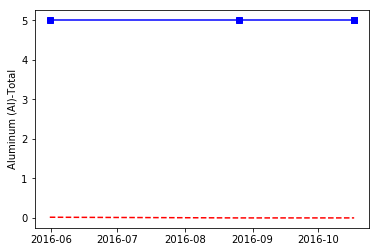

In [12]:
# request data
graphData = client.get_graph_data(start_date="May 26, 2016",
                                      end_date="May 26, 2017",
                                      station_name="AdC-0.1",
                                      analytes=["Aluminum (Al)-Total"],
                                      guidelines=["BC_WWS_ST"])
client.__del__()
analyte_data = extractAnalyteDate(graph_data=graphData)
guideline_data = extractGuidelineData(graph_data=graphData)
plt.plot_date(analyte_data[0], analyte_data[1], 'r--')
plt.plot_date(guideline_data[0], guideline_data[1], 'bs-')

plt.ylabel("Aluminum (Al)-Total")
plt.show()